In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Data preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


#For modeling
# import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score
from keras.layers import Dense, Dropout

import tensorflow as tf

In [2]:
df = pd.read_csv("clean_housing.csv");

In [3]:
df

,Unnamed: 0,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,540,1820000,3000,2,1,1,1,0,1,0,0,2,0,0,1
541,541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,0
542,542,1750000,3620,2,1,1,1,0,0,0,0,0,0,0,1
543,543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,0


In [4]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

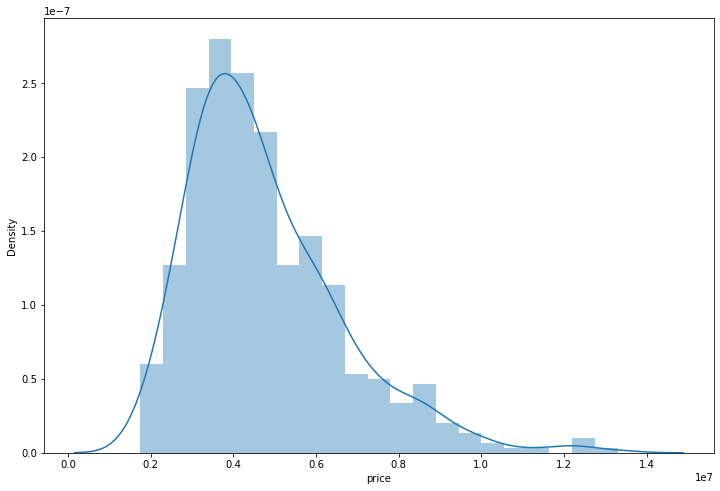

In [5]:
plt.figure(figsize=(12,8))
sns.distplot(df['price'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bedrooms', ylabel='count'>

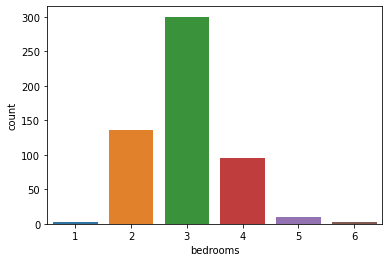

In [6]:
sns.countplot(df['bedrooms'])

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

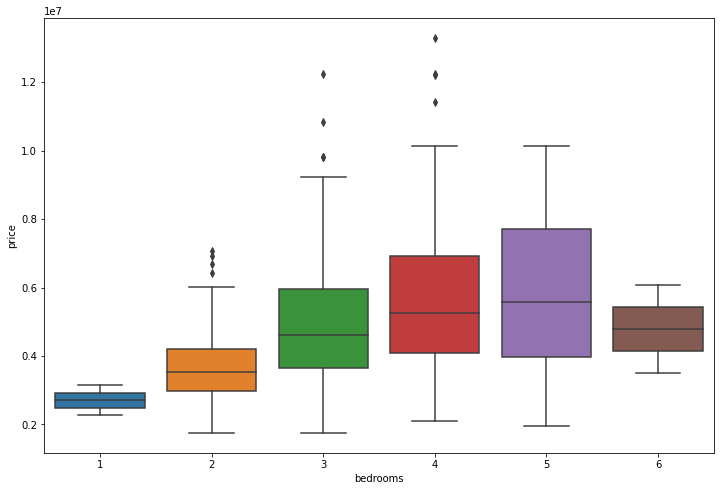

In [7]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedrooms',y='price',data=df)

## Handling Outliers

In [8]:
df.sort_values('price',ascending=False).head(20)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0
5,10850000,7500,3,3,1,1,0,1,0,1,2,1,1,0
6,10150000,8580,4,3,4,1,0,0,0,1,2,1,1,0
7,10150000,16200,5,3,2,1,0,0,0,0,0,0,0,1
8,9870000,8100,4,1,2,1,1,1,0,1,2,1,0,0
9,9800000,5750,3,2,4,1,1,0,0,1,1,1,0,1


In [9]:
# Features
X = df.drop('price',axis=1)

# Label
y = df['price']

# Split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [10]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train= scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_test.shape)

(381, 13)
(164, 13)


In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(381, 13)
(164, 13)
(381,)
(164,)


In [12]:
model = tf.keras.models.Sequential()

In [13]:
X_train.shape[1]

13

In [32]:
#input layer
# model.add(tf.keras.layers.Dense(X_train.shape[1],activation='relu'))
# model.add(Dense(32, kernel_initializer = 'uniform' ,activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(32, kernel_initializer = 'uniform' ,activation='relu'))
# model.add(Dropout(0.2))

# model.add(Dense(32, kernel_initializer = 'uniform' ,activation='relu' ))
# model.add(Dropout(0.3))
# model.add(Dense(1, activation="sigmoid"))

# Step 2============================1

#Input Layer
model.add(Dense(X_train.shape[1], activation='relu'))

#hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(128, activation='relu'))
# model.add(Dense(256, activation='relu'))
# model.add(Dense(512, activation='relu'))
# model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))

#Output Layer
model.add(Dense(1))

# initiate RMSprop optimizer
opt = tf.keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

model.compile(optimizer=opt ,loss='mse')

In [33]:
# model.fit(X_train, y_train, batch_size=32, epochs=100)
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test, y_test))

Epoch 1/200
6/6 [==============================] - 4s 96ms/step - loss: 29392491249664.0000 - val_loss: 29068984582144.0000
Epoch 2/200
6/6 [==============================] - 0s 19ms/step - loss: 27573249638400.0000 - val_loss: 28182279356416.0000
Epoch 3/200
6/6 [==============================] - 0s 19ms/step - loss: 26926355841024.0000 - val_loss: 27731720929280.0000
Epoch 4/200
6/6 [==============================] - 0s 18ms/step - loss: 26554826489856.0000 - val_loss: 27445247868928.0000
Epoch 5/200
6/6 [==============================] - 0s 18ms/step - loss: 26319561687040.0000 - val_loss: 27253975023616.0000
Epoch 6/200
6/6 [==============================] - 0s 21ms/step - loss: 26154056548352.0000 - val_loss: 27108332011520.0000
Epoch 7/200
6/6 [==============================] - 0s 27ms/step - loss: 26033627594752.0000 - val_loss: 27008834732032.0000
Epoch 8/200
6/6 [==============================] - 0s 25ms/step - loss: 25940650360832.0000 - val_loss: 26918726402048.0000
Epoch 9/

6/6 [==============================] - 0s 32ms/step - loss: 1095209254912.0000 - val_loss: 1270160424960.0000
Epoch 68/200
6/6 [==============================] - 0s 30ms/step - loss: 1182034165760.0000 - val_loss: 1258246242304.0000
Epoch 69/200
6/6 [==============================] - 0s 35ms/step - loss: 1131803181056.0000 - val_loss: 1291093934080.0000
Epoch 70/200
6/6 [==============================] - 0s 38ms/step - loss: 1110192553984.0000 - val_loss: 1260247842816.0000
Epoch 71/200
6/6 [==============================] - 0s 25ms/step - loss: 1111041900544.0000 - val_loss: 1251392225280.0000
Epoch 72/200
6/6 [==============================] - 0s 24ms/step - loss: 1096035729408.0000 - val_loss: 1263286878208.0000
Epoch 73/200
6/6 [==============================] - 0s 25ms/step - loss: 1149435117568.0000 - val_loss: 1305507528704.0000
Epoch 74/200
6/6 [==============================] - 0s 26ms/step - loss: 1188599037952.0000 - val_loss: 1265420599296.0000
Epoch 75/200
6/6 [===========

6/6 [==============================] - 0s 31ms/step - loss: 1114537590784.0000 - val_loss: 1305187975168.0000
Epoch 134/200
6/6 [==============================] - 0s 33ms/step - loss: 1104369680384.0000 - val_loss: 1271509286912.0000
Epoch 135/200
6/6 [==============================] - 0s 33ms/step - loss: 1117498769408.0000 - val_loss: 1288778416128.0000
Epoch 136/200
6/6 [==============================] - 0s 24ms/step - loss: 1138634129408.0000 - val_loss: 1252832837632.0000
Epoch 137/200
6/6 [==============================] - 0s 25ms/step - loss: 1086390403072.0000 - val_loss: 1372393177088.0000
Epoch 138/200
6/6 [==============================] - 0s 24ms/step - loss: 1217824423936.0000 - val_loss: 1259943493632.0000
Epoch 139/200
6/6 [==============================] - 0s 25ms/step - loss: 1088943423488.0000 - val_loss: 1281349910528.0000
Epoch 140/200
6/6 [==============================] - 0s 24ms/step - loss: 1140649230336.0000 - val_loss: 1313615249408.0000
Epoch 141/200
6/6 [===

6/6 [==============================] - 0s 24ms/step - loss: 1095650639872.0000 - val_loss: 1265996398592.0000
Epoch 200/200
6/6 [==============================] - 0s 23ms/step - loss: 1095549648896.0000 - val_loss: 1258296049664.0000


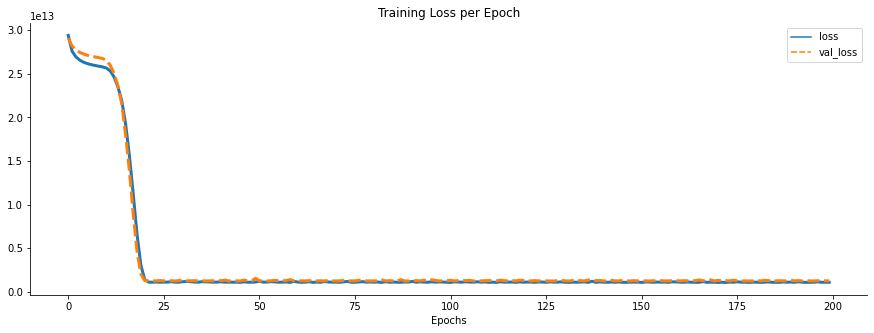

In [34]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('')
plt.title('Training Loss per Epoch')
sns.despine()

In [35]:
from sklearn import metrics

def print_evaluate(true, predicted, train=True):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    if train:
        print("========Training Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)
    elif not train:
        print("=========Testing Result=======")
        print('MAE: ', mae)
        print('MSE: ', mse)
        print('RMSE: ', rmse)
        print('R2 Square: ', r2_square)

In [36]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

6/6 [==============================] - 0s 3ms/step
========Training Result=======
MAE:  794078.7280183727
MSE:  1087304494513.3206
RMSE:  1042738.9388113022
R2 Square:  0.6966852518311548
=========Testing Result=======
MAE:  825807.0838414634
MSE:  1258295985030.1345
RMSE:  1121737.9306371585
R2 Square:  0.614388055378405


In [19]:
df['price'].mean()

4766729.247706422

# Comparing with LinearRegression

In [20]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

LinearRegression()

In [21]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print_evaluate(y_train, y_train_pred, train=True)
print_evaluate(y_test, y_test_pred, train=False)

========Training Result=======
MAE:  767497.5424481367
MSE:  1063077278741.0269
RMSE:  1031056.3896999168
R2 Square:  0.7034436823240728
=========Testing Result=======
MAE:  817762.9532006788
MSE:  1264406165048.4836
RMSE:  1124458.165094853
R2 Square:  0.6125155560404951
